# Saturation excess process

basato sui notebook di Niccolò Tubini e Riccardo Rigon.

Autori: Niccolò Schiavi Cappello, Marco Feltrin, Alessandro Lagrecacolonna

## Introduzione

In questo notebook si vuole analizzare gli effetti di deflusso superficiale e deflusso sub superficiale, per farlo utiliziamo un suolo composto da tre
strati di suolo, rispettivamente: 

| Type    | eta   | K      | equationStateID   | parameterID |
|  :---:  | :---: | :---:  | :---:             | :---:       |
|L        | 0     | 150    | 1                 | 5           |
|L        | -0.75 | 150    | 150               | 1           |
|L        | -1.25 | 150    | 150               | 8           |
|L        | -2    | 0      | nan               | nan         |

ed i vari strati di suolo hanno i seguenti parametri:

|$\theta_r$ [-]|$\theta_s$ [-]|$\alpha$ [m$^{-1}$] |$n$ [-]|$K_s$ [m s$^{-1}$]   |$type$ [-] |
|--------------|--------------|--------------------|-------|---------------------|------------|
|0.078         |0.43          |3.6                 |1.56   |$2.88 \times 10^{-6}$ |loam       |
|0.045         |0.43          |14.5                |2.68   |$8.25 \times 10^{-5}$ |sand       | 
|0.095         |0.41          |1.9                 |1.31   |$7.22 \times 10^{-7}$ |clay loam  |


Successivamente si è creato un file contenente delle precipitazioni create ad hoc affinchè possa verificarsi il fenomeno di saturazione dal basso.

La simulazione è stata calcolata in un intervallo temporale che va da: 2019-11-13 al 2019-11-28, considerando un timestep di 20 minuti

In tutta l'analisi si è trascurato l'effetto della temperatura sul processo di infiltrazione.

In [5]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')
project_path = os.path.dirname(os.getcwd())

In [6]:

grid_input_file_name = project_path + "/WETGEO/Grid_input/ex2955_grid_4_02.csv"        #griglia con le informazioni sullo strato e la sua discretizzazione

ic_input_file_name = project_path + "/WETGEO/Grid_input/ex2955_ic_4_02.csv"            #condizioni iniziali

parameter_input_file_name = project_path + "/WETGEO/Grid_input/Richards_VG.csv"     #import dei parametri delle curve di ritenzione idrica

dictionary_input_file_name = project_path + "/WETGEO/Grid_input/dictionary.csv"     #dizionario con le informazioni sui suoli

grid_type = 'classical'                                                             #griglia classica con elementi tutti uguali tra loro

dz_min = -9999       # not required for grid_type = 'classical'

dz_max = -9999      # not required for grid_type = 'classical'

b = -9999           # not required for grid_type = 'classical'

psi_interp_model = "linear"       #interpolazione della suzione lineare

T_interp_model = "linear"         #interpolazione della temperatura lineare

water_ponding_0 = -5.0            #suzione sul piano di campagna

T_water_ponding_0 = 273.15

output_file_name =  project_path + "/WETGEO/Grid_NetCDF/ex2955_grid_4_02.nc"

output_title = '''Computational grid for saturation excess. With different rainfall leghts and intensity
                  '''
output_summary = '''

'''

output_date = ''

output_institution = 'GEOframe'

## Creazione della griglia NetCDF:

In [7]:
data_grid = pd.read_csv(grid_input_file_name)

data_ic = pd.read_csv(ic_input_file_name)

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=True)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, water_ponding_0=water_ponding_0, T_water_ponding_0=T_water_ponding_0, shallow_water=True)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\marco\Desktop/WETGEO/Grid_NetCDF/ex2955_grid_4_02.nc


# parametri utilizzati nella simulazione

In [8]:
def richardsGridFileName = "$oms_prj//Grid_NetCDF/ex2955_grid_4_02.nc"

def typeClosureEquation = "{Water Depth,Van Genuchten}"
//def typeClosureEquation = "{Water Depth,Brooks Corey}"

def typeEquationState = "{Water Depth,Van Genuchten}"
//def typeEquationState = "{Water Depth,Brooks Corey}"

def typeUHCModel = "{null,Mualem Van Genuchten}"
//def typeUHCModel = "{null,Mualem Brooks Corey}"

def typeUHCTemperatureModel = "notemperature"

def interfaceHydraulicConductivityModel = "max"

def topBCType = "Top Coupled"             #condizione al contorno superficiale è lagata all' intensità di precipitazione

def bottomBCType = "Bottom Dirichlet"     #condizione al contorno al fondo assegnando il valore di suzione al fondo

def maxPonding = 0.0

def stationID = "1"

def startDate= "2019-11-13 00:00"

def endDate= "2019-11-28 00:00"

def tTimestep = 20

def topBCFileName = "$oms_prj//Timeseries/ex2955_rain_artificiale_long.csv"

def bottomBCFileName = "$oms_prj//Timeseries/ex2955_const_suction_minus2.csv"

def saveDatesFileName = "$oms_prj//Timeseries/ex2955_save_date.csv"

def outputFileName = "$oms_prj//output/ex2955_4_double_02.nc"


def writeFrequency = 10000


SyntaxError: invalid syntax (2419569950.py, line 1)

## Post-processing  

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
from geoframepy.timeseries import io_csv
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,          #False se non si ha installato LaTEX
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

## Output file 

In [10]:
ds = xr.open_dataset(project_path + '/WETGEO/output/ex2955_4_double_02_0000.nc')
ds

<xarray.Dataset>
Dimensions:           (depth: 451, dualDepth: 451, time: 1081)
Coordinates:
  * depth             (depth) float64 -1.998 -1.993 -1.988 ... -0.0025 0.0
  * dualDepth         (dualDepth) float64 -2.0 -1.995 -1.99 ... -0.01 -0.005 0.0
  * time              (time) datetime64[ns] 2019-11-13 ... 2019-11-28
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex04.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:\Users\marco\Desktop\WETGEO//Timese...
    path_bottom_boundary_condition:     C:\Users\marco\Desktop\WETGEO//Timese...
    path_grid:                          C:\Users\marco\Desktop\WETGEO//Grid_N...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

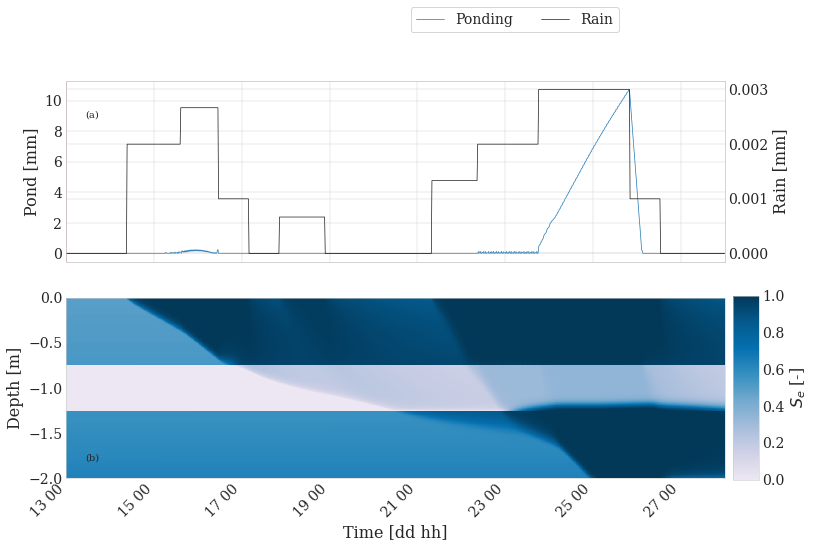

In [11]:
line_w = 0.7

start_date = '2019-11-13 00:00'
end_date = '2019-11-28 00:00'

plot_width = 15/2.54

fig, ax = plt.subplots(2, 1, sharex='col', gridspec_kw={'height_ratios': [1,1]},figsize=(plot_width*2,plot_width*2/1.618))

lns1 = ax[0].plot(ds.time.sel(time=slice(start_date, end_date)).values, ds.waterVolume.sel(depth=0).sel(time=slice(start_date,end_date))*1000, label='Ponding', color='#1f78b4', linewidth=line_w)

ax0twin = ax[0].twinx()
lns2 = ax0twin.plot(ds.time.sel(time=slice(start_date, end_date)).values, ds.topBC.sel(time=slice(start_date,end_date))/300, label='Rain', linewidth=line_w, color='0.1')

ax0twin.set_ylabel('Rain [mm]')
ax[0].set_ylabel('Pond [mm]')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax[0].legend(lns, labs, bbox_to_anchor=(0.85,1.45) , ncol=2)


norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
im = ds.saturationDegree.where(ds.depth<0.0).sel(time=slice(start_date, end_date)).plot(ax=ax[1], y='depth', add_colorbar=False, cmap=my_cmap, norm=norm)
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh]')

cbaxes = fig.add_axes([0.91, 0.122, 0.03, 0.35]) 
cbar = fig.colorbar(im, ax=ax[1],orientation="vertical",fraction=0.07, pad=0.1, cax=cbaxes, label='$S_e$ [-]')

ax[0].axvline(x=ds.time.sel(time='2019-11-13 00:00').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')
ax[0].axvline(x=ds.time.sel(time='2019-11-28 00:00').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')

ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
ax[1].xaxis.set_tick_params(rotation=45)

plt.text( 0.03,0.8, '(a)', fontsize=10,
             transform=ax[0].transAxes)
plt.text( 0.03,0.1, '(b)', fontsize=10,
             transform=ax[1].transAxes)


plt.show()

Nella simulazione sovrastante possiamo notare diversi fenomeni:
 - diversa pendenza delle curve di infiltrazione e la sosta della curva nella prima interfaccia tra strati
 - deflusso sub supeficiale
 - saturazione dal basso (deflusso Dunniano)

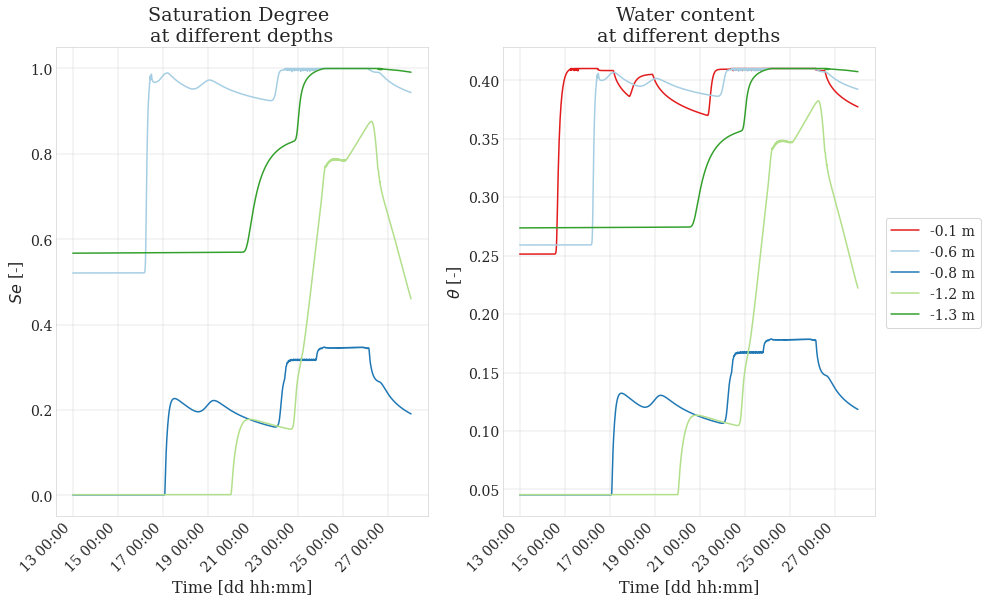

In [14]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(14, 14/1.618))
ds.saturationDegree.sel(depth=-0.6,method='nearest').plot(ax=ax1, color=colors[0])
ds.saturationDegree.sel(depth=-0.8,method='nearest').plot(ax=ax1, color=colors[1])
ds.saturationDegree.sel(depth=-1.2,method='nearest').plot(ax=ax1, color=colors[2])
ds.saturationDegree.sel(depth=-1.3,method='nearest').plot(ax=ax1, color=colors[3])

ax1.set_title('Saturation Degree \nat different depths')


ax1.set_ylabel('$Se$ [-]')
ax1.set_xlabel('Time [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[5])
ds.theta.sel(depth=-0.6, method='nearest').plot(ax=ax2, label = '-0.6 m', color=colors[0])
ds.theta.sel(depth=-0.8, method='nearest').plot(ax=ax2, label = '-0.8 m', color=colors[1])
ds.theta.sel(depth=-1.2, method='nearest').plot(ax=ax2, label = '-1.2 m', color=colors[2])
ds.theta.sel(depth=-1.3, method='nearest').plot(ax=ax2, label = '-1.3 m', color=colors[3])

ax2.set_title('Water content \nat different depths')


ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Time [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()